Antes que nada, definimos los ejemplos de triangulaciones con los que trabajaremos. Algunas observaciones:


1. Un dibujo para Tri se encuentra en Edelsbrunner p34, Figure II.7.
2. La triangulacion de S2 presentada es la de las caras de un tetrahedro.
3. La triangulacion de T2 presentada fue calculada a partir del siguiente dibujo: https://www.researchgate.net/profile/Lynnelle-Ye/publication/48187858/figure/fig2/AS:650479902150672@1532097902606/A-triangulation-of-the-torus-Note-that-there-are-18-2-simplices-in-addition-to-the.png


   

In [1]:
Tri = [('a','b','c'), ('a','b','x'), ('a','y','c'), ('z','b','c')]

S2 = [(0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3)]

T2 = [
    (0, 1, 3), (1, 3, 5), (1, 2, 5), (2, 5, 6),
    (2, 6, 0), (6, 0, 3), (3, 5, 4), (4, 5, 7),
    (5, 6, 7), (7, 6, 8), (6, 3, 8), (8, 3, 4),
    (0, 4, 7), (0, 7, 1), (1, 7, 8), (1, 8, 2),
    (2, 8, 4), (2, 4, 0)
]

RP2 = [
    (0, 2, 3), (0, 3, 4), (0, 1, 5), (0, 4, 5),
    (2, 3, 5), (1, 2, 4), (0, 1, 2), (1, 3, 4),
    (1, 3, 5), (2, 4, 5)
]

Klein = [
    (3, 4, 6), (2, 5, 7), (2, 3, 7), (3, 4, 7),
    (1, 4, 7), (0, 2, 5), (2, 4, 6), (1, 2, 6),
    (0, 1, 6), (1, 3, 5), (1, 2, 3), (0, 2, 4),
    (1, 5, 7), (0, 1, 4), (0, 5, 6), (3, 5, 6)
]

Como el ejercicio 3 proporciona una solucion sencilla al ejercicio 2, lo resolvemos primero.

Ejercicio 3. Asuma como entrada al programa una triangulacion de una superficie la cual no sabemos cual es. Elabore un programa que asigne la grafica donde un nodo es un triangulo y los vertices estan dados por arcos conectando los nodos entre triangulos cercanos que tienen un eje compartido.

Solucion. La idea es:
1. Creamos una grafica vacia.
2. Agregamos cada triangulo como vertice.
3. Si la cardinalidad de la interseccion entre dos triangulos es 2, agregamos una arista entre esos dos triangulos. (Notemos que para esto, primero convertimos los triangulos (que a priori son 3-tuples) a conjuntos usando set(), luego calculamos su interseccion usando '&', y finalmente calculamos la longitud de la interseccion usando len().)


In [2]:
import networkx as nx

def TriToGph(Tri):
  Gph = nx.Graph()
  Gph.add_nodes_from(Tri)
  for µ in Tri:
    for v in Tri:
      if len(set(µ) & set(v)) == 2:
        Gph.add_edge(µ, v)
  return Gph

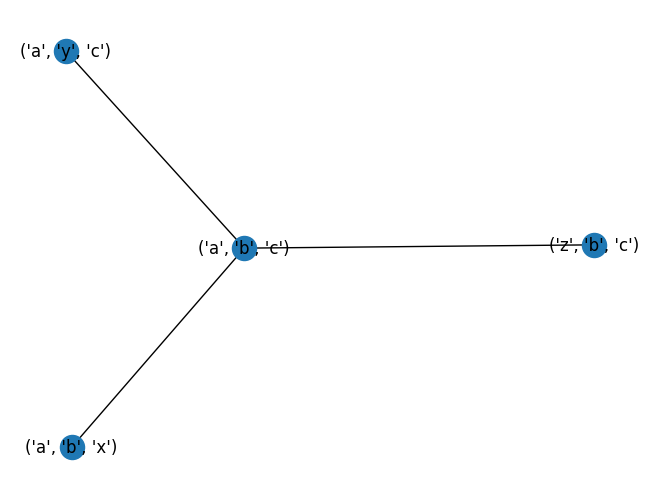

In [3]:
nx.draw(TriToGph(Tri), with_labels=True)

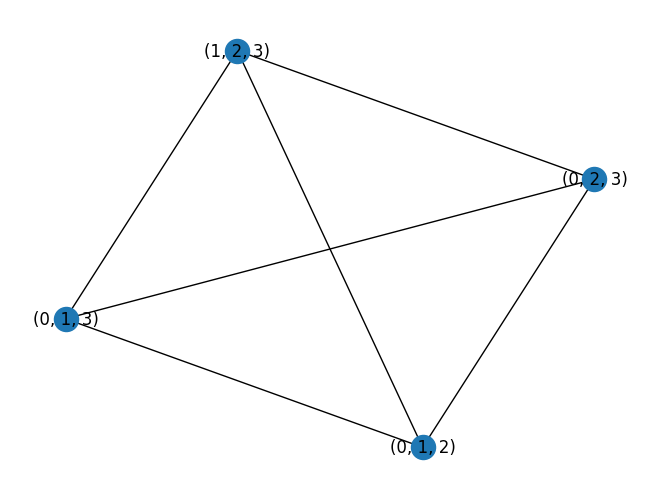

In [4]:
nx.draw(TriToGph(S2), with_labels=True)

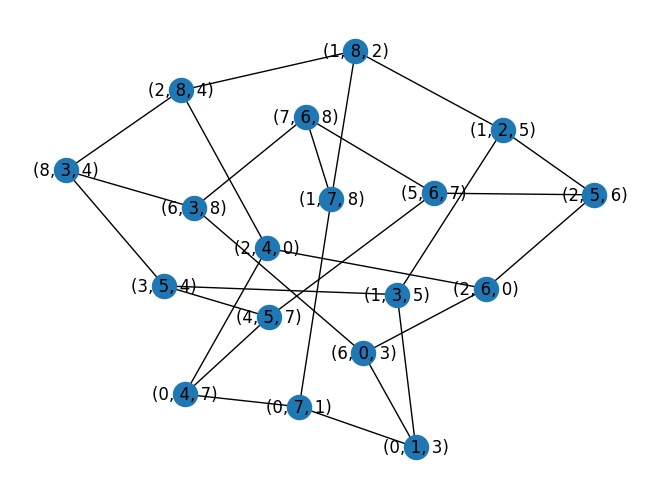

In [5]:
nx.draw(TriToGph(T2), with_labels=True)

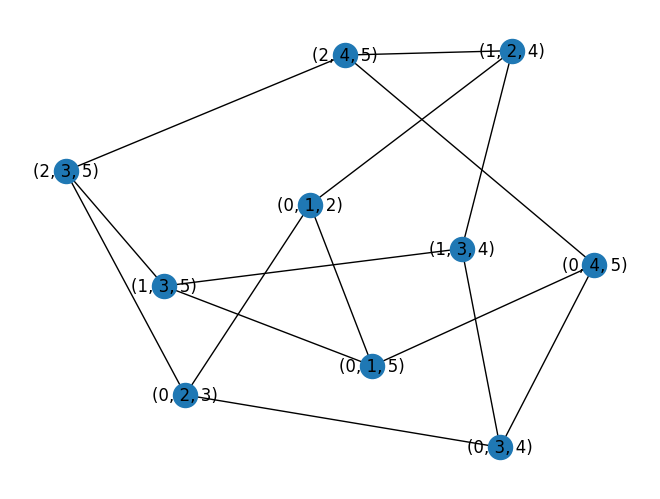

In [6]:
nx.draw(TriToGph(RP2), with_labels=True)

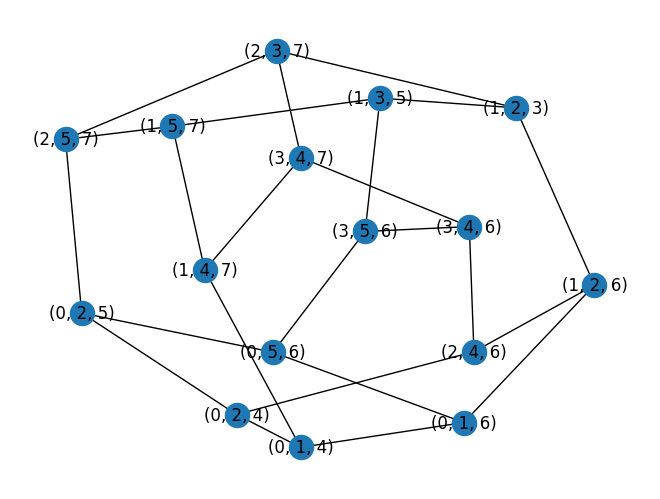

In [7]:
nx.draw(TriToGph(Klein), with_labels=True)

Ejercicio 2. Programe un algoritmo que me permita saber si una triangulacion proviene de una superficie cerrada sin frontera.

Solucion. Observemos que un triangulo no es parte de la frontera si y solo si tiene 3 vecinos. La funcion noBoundary() verifica que el grado de cada uno de los vertices de la grafica obtenida en el ejercicio 3, es 3.

In [8]:
def noBoundary(Tri):
  Gph = TriToGph(Tri)
  return all(Gph.degree[vertex] == 3 for vertex in list(Gph.nodes))

In [9]:
noBoundary(Tri)

False

In [10]:
noBoundary(S2)

True

In [11]:
noBoundary(T2)

True

In [12]:
noBoundary(RP2)

True

In [13]:
noBoundary(Klein)

True

Antes de presentar la solucion para el ejercicio 4, explicamos la estructura de datos usada. Las funciones ENEXT y SYM son las mismas que en el Edelsbrunner y por eso omitimos su explicacion. La funcion OppVtx(Tri, µ, ι) calcula el vertice opuesto a el leading edge de (µ, ι) que no es vertice de µ (en la triangulacion Tri). La idea es:

1. Reducimos los casos a ι = 0,1,2 pues realmente no nos interesa la orientacion (solo nos interesa cual es el leading edge).
2. Definimos el leading edge como el conjunto edge.
3. Creamos la lista µTri = [ set(v) for v in Tri ].
4. Quitamos a set(µ) de µTri.
5. Hacemos un for loop sobre µTri (el cual ya no contiene a µ) y encontramos el vertice opuesto. Para esto, verificamos que edge este contenido en set(v) y regresamos el vertice que queda despues de calcular la diferencia entre set(v) y edge. Si la triangulacion esta bien definida, la condicion de que edge este contenido en set(v) se deberia cumplir unicamente para el otro triangulo que buscamos y al calcular la diferencia set(v)-edge obtendriamos el vertice deseado.

La funcion AdjTri(Tri, µ, ι) calcula el triangulo adyacente a el leading edge de (µ, ι) en el orden conveniente (cf. la descripcion de FNEXT de Edelsbrunner). Esta funcion solo difiere de FNEXT en que solo calcula el triangulo sin orientacion. Finalmente, FNEXT es la misma que en el Edelsbrunner y por eso omitimos su explicacion.

In [14]:
def ENEXT(µ, ι):
  if ι <= 2:
    return (µ, (ι+1) % 3)
  else:
    return (µ, ((ι+1) % 3) + 4)

In [15]:
def SYM(µ, ι):
  return (µ, (ι+4) % 8)

In [16]:
def OppVtx(Tri, µ, ι):
  if ι >= 4:
    ι = (ι+4) % 8
  edge = {µ[ι % 3], µ[(ι+1) % 3]}
  µTri = [set(v) for v in Tri]
  µTri.remove(set(µ))
  for v in µTri:
    if edge <= set(v):
      return list(set(v)-edge)[0]

In [17]:
def AdjTri(Tri, µ, ι):
  µx = (µ[0], µ[1], OppVtx(Tri, µ, ι))
  µy = (µ[0], OppVtx(Tri, µ, ι), µ[2])
  µz = (OppVtx(Tri, µ, ι), µ[1], µ[2])
  idk = [µx, µz, µy]
  if ι <= 2:
    return idk[ι]
  else:
    return idk[(ι+4) % 8]

In [18]:
def FNEXT(Tri, µ, ι):
  return (AdjTri(Tri, µ, ι), ι)

Verificamos que FNEXT haga lo deseado. Cabe recalcar que esta funcion solo esta bien definida para triangulos interiores y que el unico triangulo interior de Tri es Tri[0] = ('a', 'b', 'c').

In [19]:
for ι in [0,1,2,4,5,6]:
  print(FNEXT(Tri, Tri[0], ι))

(('a', 'b', 'x'), 0)
(('z', 'b', 'c'), 1)
(('a', 'y', 'c'), 2)
(('a', 'b', 'x'), 4)
(('z', 'b', 'c'), 5)
(('a', 'y', 'c'), 6)


Ejercicio 4. Utilice las tareas anteriores y mediante el proceso de busqueda (e.g. depth-first search) programe una manera de asignar orientaciones para saber si la triangulacion proviene de una superficie orientada o no orientada.

Solucion. La implementacion esta completamente basada en el pseudocodigo de Edelsbrunner. Solo hay dos detalles:

1. Como ι = 0,1,2 inducen la misma orientacion y ι = 4,5,6 inducen la otra orientacion, definimos la funcion auxiliar Ori(ι) que regresa la lista [0,1,2] si ι = 0,1,2 y regresa la lista [4,5,6] si ι = 4,5,6.
2. Para establecer orientaciones creamos un diccionario donde cada key es un triangulo orientado µ y su valor es Ori(ι).
3. Agregamos un parametro dori = None (dori es abreviacion para dictionary of orientations) para que no se cree un diccionario nuevo cada que hacemos una llamada recursiva. Alternativamente, podiamos definir el diccionario afuera de la funcion pero esto presentaria dificultades cuando corramos la funcion para dos triangulaciones diferentes.

In [20]:
def Ori(ι):
  if ι <= 2:
    return [0,1,2]
  else:
    return [4,5,6]

def isOrientable(Tri, µ, ι, dori = None):
    if dori is None:
        dori = dict()
    if µ not in dori:
        dori[µ] = Ori(ι)
        s = SYM(µ, ι)
        fs = FNEXT(Tri, s[0], s[1])
        es = ENEXT(s[0], s[1])
        fes = FNEXT(Tri, es[0], es[1])
        ees = ENEXT(es[0], es[1])
        fees = FNEXT(Tri, ees[0], ees[1])
        bx = isOrientable(Tri, fs[0], fs[1], dori)
        by = isOrientable(Tri, fes[0], fes[1], dori)
        bz = isOrientable(Tri, fees[0], fees[1], dori)
        return bx and by and bz
    else:
        return ι in dori[µ]

In [21]:
isOrientable(S2, S2[0], 0)

True

In [22]:
isOrientable(T2, T2[0], 0)

True

In [23]:
isOrientable(RP2, RP2[0], 0)

False

In [24]:
isOrientable(Klein, Klein[0], 0)

False

Una funcion para calcular el numero de vertices en una triangulacion.

In [25]:
def numVertices(Tri):
  vertices = set()
  for µ in Tri:
    vertices.update(µ)
  return len(vertices)

In [26]:
numVertices(S2)

4

In [27]:
numVertices(T2)

9

In [28]:
numVertices(RP2)

6

In [29]:
numVertices(Klein)

8

Una funcion para calcular el numero de triangulacion de una triangulacion. Cabe recalcar que cuando la triangulacion es una lista (como en nuestro caso), esta funcion no es necesaria pues podriamos simplemente llamar len(Tri). La puse solo para reforzar mi entendimiento de depth-first search.

In [30]:
def numTriangles(Tri, µ, ι, ltri = None):
  if ltri is None:
    ltri = []
  if set(µ) not in ltri:
    ltri.append(set(µ))
    f = FNEXT(Tri, µ, ι)
    e = ENEXT(µ, ι)
    fe = FNEXT(Tri, e[0], e[1])
    ee = ENEXT(e[0], e[1])
    fee = FNEXT(Tri, ee[0], ee[1])
    lx = numTriangles(Tri, f[0], f[1], ltri)
    ly = numTriangles(Tri, fe[0], fe[1], ltri)
    lz = numTriangles(Tri, fee[0], fee[1], ltri)
    return lx + ly + lz + 1
  else:
    return 0

In [31]:
numTriangles(S2, S2[0], 0)

4

In [32]:
numTriangles(T2, T2[0], 0)

18

In [33]:
numTriangles(RP2, RP2[0], 0)

10

In [34]:
numTriangles(Klein, Klein[0], 0)

16

Ejercicio 5. Decida el tipo topologico de la superficie de la triangulacion.

Solucion. La implementacion esta completamente basada en el pseudocodigo de Edelsbrunner.

In [35]:
def Genus(Tri, µ, ι):
  n = numVertices(Tri)
  l = numTriangles(Tri, µ, ι)
  if isOrientable(Tri, µ, ι):
    return int((l - 2*n + 4)/4)
  else:
    return int((l - 2*n + 4)/2)

In [36]:
Genus(S2, S2[0], 0)

0

In [37]:
Genus(T2, T2[0], 0)

1

In [38]:
Genus(RP2, RP2[0], 0)

1

In [39]:
Genus(Klein, Klein[0], 0)

2